In [1]:
import timeit
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_38552/1561394266.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Función Objetivo
Funcion numero 128 de Momin Jamil and Xin-She Yang. A literature survey of benchmark functions for global optimisation problems. International Journal of Mathematical Modelling and Numerical Optimi- sation, 4(2):150–194, 2013.

$$ f(x) = - \frac{1}{D} \sum_{i=1}^{D} x_i sin(\sqrt{|x_i|}) $$

In [43]:
def f(x):
    return -np.mean(x * np.sin(np.sqrt(np.abs(x))))


<Figure size 1200x800 with 0 Axes>

### Gráfico para D=1 (2D)

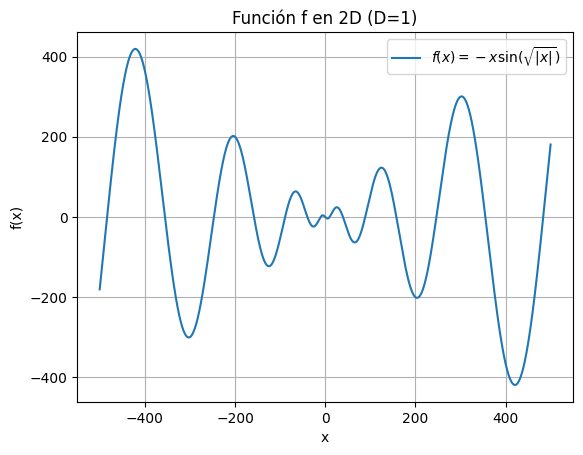

In [129]:
x1d = np.linspace(-500,500,4000)
y1d = np.array([f(x) for x in x1d ])

plt.plot(x1d, y1d, label=r'$f(x) = -x \sin(\sqrt{|x|})$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función f en 2D (D=1)')
plt.grid(True)
plt.legend()
plt.show()

### Gráfico para D=2 (3D)

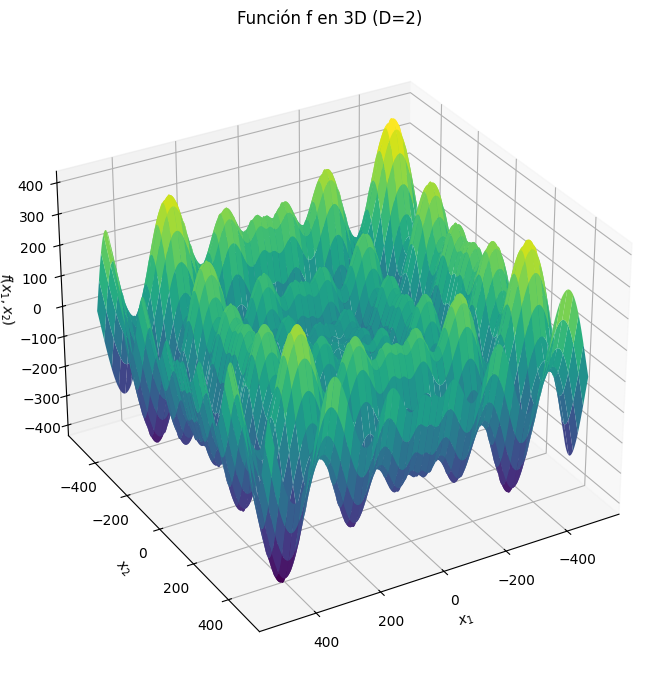

In [85]:
x1_2d = np.linspace(-500,500,1000)
x2_2d = np.linspace(-500,500,1000)

def f_2d(x,y):
    return -0.5 * ( x * np.sin(np.sqrt(np.abs(x))) + y * np.sin(np.sqrt(np.abs(y))))

X1_2d, X2_2d = np.meshgrid(x1_2d,x2_2d)
Z = f_2d(X1_2d, X2_2d)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_2d, X2_2d, Z, cmap='viridis')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1,x_2)$')
ax.set_title('Función f en 3D (D=2)')
ax.view_init(elev=30, azim=60)
plt.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.1)

plt.show()

## Métodos de Optimización
### Cuasi-Newton

In [103]:

def opt_lbfgsb(d):
    constrains = [(-500, 500)] * d
    x0 = np.random.uniform(-500, 500, d)
    res = opt.minimize(f, x0, method = 'L-BFGS-B', bounds=constrains)
    return res


### Recocido Simulado

In [104]:

def opt_sim_annealing(d):
    constrains = [(-500, 500)] * d
    res = opt.dual_annealing(f, bounds=constrains)
    return res


### Evolución Diferencial

In [105]:
def opt_diff_evolution(d):
    constrains = [(-500, 500)] * d
    res = opt.differential_evolution(f, bounds=constrains)
    return res


## Ejecución de los Métodos

In [106]:
def measure(func, d, n=30):
    times = []
    min = 500
    opt = []

    for _ in range(n):
        start_t = timeit.default_timer()
        res = func(d)
        times.append(timeit.default_timer() - start_t)

        if res.fun < min:
          min = res.fun
          opt = res.x

    return  np.mean(times), np.std(times), opt, min

In [117]:
df =  pd.DataFrame()

In [118]:
df =  pd.DataFrame()

for i in range(30,31):
    #
    mean_l, std_l, opt_l, min_l = measure(opt_lbfgsb, i)
    tl = {'method': ['L-BFGS-B'], 'dimension': [i], 'mean': [mean_l], 'std': [std_l], 'opt': [opt_l], 'min': [min_l]}

    #
    mean_s, std_s, opt_s, min_s = measure(opt_sim_annealing, i)
    ts = {'method': ['Simulated Annealing'], 'dimension': [i], 'mean': [mean_s], 'std': [std_s], 'opt': [opt_s], 'min': [min_s]}

    #
    mean_d, std_d, opt_d, min_d = measure(opt_diff_evolution, i)
    td = {'method': ['Differential Evolution'], 'dimension': [i], 'mean': [mean_d], 'std': [std_d], 'opt': [opt_d], 'min': [min_d]}

    #
    df = pd.concat([df, pd.DataFrame(td), pd.DataFrame(ts), pd.DataFrame(tl)])

    if(i%5==0):
        print(i)




3
6
9
12
15
18
21
24
27


In [ ]:
df.to_csv('./data/method_mesurements.csv')

In [2]:
df = pd.read_csv('./data/method_mesurements.csv')

In [133]:
df.head()

,Unnamed: 0,method,dimension,mean,std,opt,min
0,0,Differential Evolution,1,0.013103,0.001810,[420.96874594],-418.982887
1,0,Simulated Annealing,1,0.128284,0.005538,[420.96874715],-418.982887
2,0,L-BFGS-B,1,0.002386,0.001277,[420.96874411],-418.982887
3,0,Differential Evolution,2,0.043718,0.006954,[420.96874005 420.96875751],-418.982887
4,0,Simulated Annealing,2,0.283399,0.065925,[420.9687509 420.9687448],-418.982887


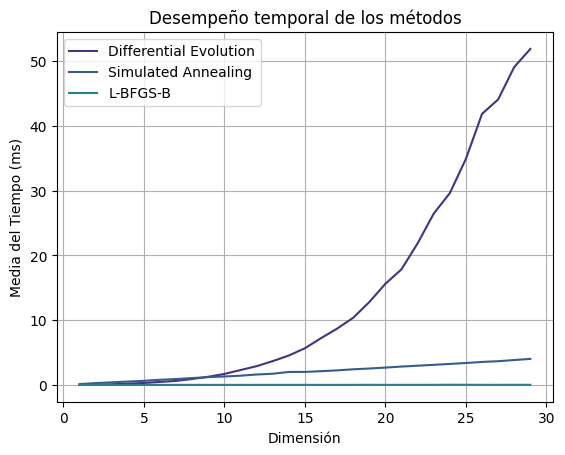

In [9]:
sns.set_palette('viridis')
sns.lineplot(df, x='dimension', y='mean', hue='method')
plt.xlabel('Dimensión')
plt.ylabel('Media del Tiempo (ms)')
plt.title('Desempeño temporal de los métodos')
plt.grid(True)
plt.legend()
plt.show()

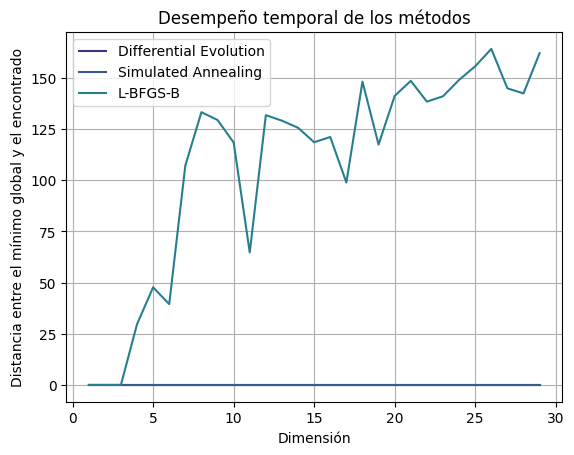

In [142]:
df['error'] =  df['min'] - (-418.983)

sns.lineplot(df, x='dimension', y='error', hue='method')
plt.xlabel('Dimensión')
plt.ylabel('Distancia entre el mínimo global y el encontrado')
plt.title('Validez de la mejor respuesta encontrada')
plt.grid(True)
plt.legend()
plt.show()



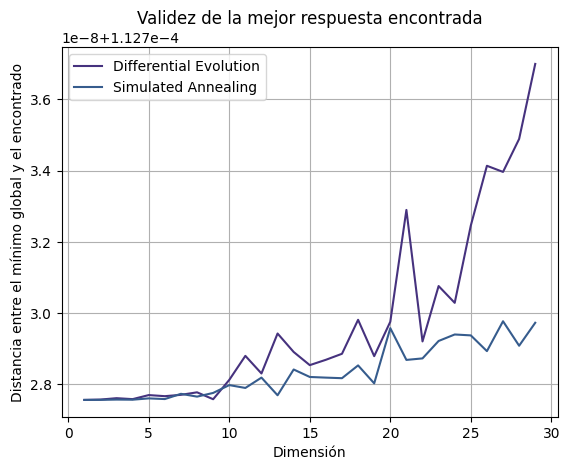

In [143]:
sns.lineplot(df[df['method']!='L-BFGS-B'], x='dimension', y='error', hue='method')
plt.xlabel('Dimensión')
plt.ylabel('Distancia entre el mínimo global y el encontrado')
plt.title('Validez de la mejor respuesta encontrada')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
import re

def replace_spaces(text):
    # Expresión regular para encontrar espacios entre números flotantes
    return re.sub(r'(?<=\d|\.)\s+(?=\d|\.|\-)', ',', text)

df['opt'] = df['opt'].apply(replace_spaces)
df.head()

,Unnamed: 0,method,dimension,mean,std,opt,min
0,0,Differential Evolution,1,0.013103,0.001810,[420.96874594],-418.982887
1,0,Simulated Annealing,1,0.128284,0.005538,[420.96874715],-418.982887
2,0,L-BFGS-B,1,0.002386,0.001277,[420.96874411],-418.982887
3,0,Differential Evolution,2,0.043718,0.006954,"[420.96874005,420.96875751]",-418.982887
4,0,Simulated Annealing,2,0.283399,0.065925,"[420.9687509,420.9687448]",-418.982887


In [7]:
def rmse(x_str):
    x = eval(x_str)
    x = np.array(x)
    dim = len(x)
    opt = np.array([420.9687]*dim)
    return np.sqrt(np.mean((x - opt)**2))

df['rmse'] = df['opt'].apply(rmse)
df.head()

,Unnamed: 0,method,dimension,mean,std,opt,min,rmse
0,0,Differential Evolution,1,0.013103,0.001810,[420.96874594],-418.982887,0.000046
1,0,Simulated Annealing,1,0.128284,0.005538,[420.96874715],-418.982887,0.000047
2,0,L-BFGS-B,1,0.002386,0.001277,[420.96874411],-418.982887,0.000044
3,0,Differential Evolution,2,0.043718,0.006954,"[420.96874005,420.96875751]",-418.982887,0.000050
4,0,Simulated Annealing,2,0.283399,0.065925,"[420.9687509,420.9687448]",-418.982887,0.000048


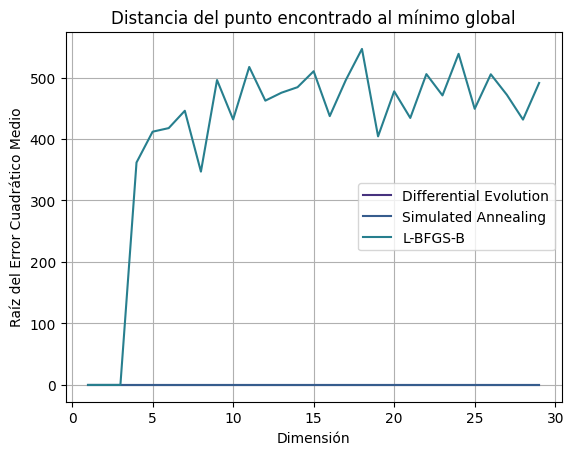

In [12]:
sns.lineplot(df, x='dimension', y='rmse', hue='method')
plt.xlabel('Dimensión')
plt.ylabel('Raíz del Error Cuadrático Medio')
plt.title('Distancia del punto encontrado al mínimo global')
plt.grid(True)
plt.legend()
plt.show()

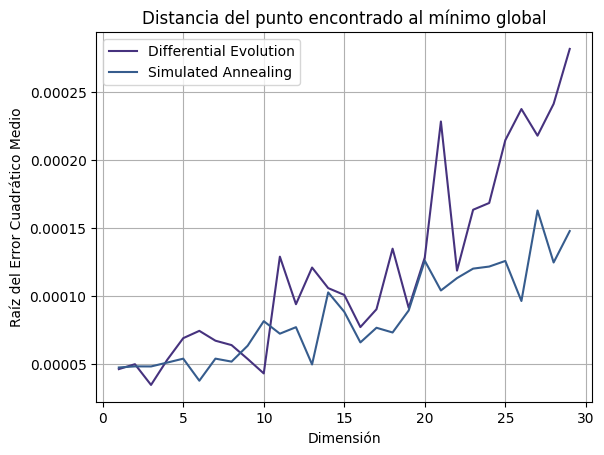

In [13]:
sns.lineplot(df[df['method']!='L-BFGS-B'], x='dimension', y='rmse', hue='method')
plt.xlabel('Dimensión')
plt.ylabel('Raíz del Error Cuadrático Medio')
plt.title('Distancia del punto encontrado al mínimo global')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
np.sqrt(420.9687)/np.pi

6.5309300226212965